# Predicting Bank Deposit Subscriptions Using Logistic Regression

The following dataset comes from the UCI Machine Learning repository, and is related to direct marketing campaigns (phone calls) of a Portguese banking institution. The dataset columns are below:

- age (numeric)
- job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
- marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
- education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
- default: has credit in default? (categorical: “no”, “yes”, “unknown”)
- housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
- loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
- contact: contact communication type (categorical: “cellular”, “telephone”)
- month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
- day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
- emp.var.rate: employment variation rate — (numeric)
- cons.price.idx: consumer price index — (numeric)
- cons.conf.idx: consumer confidence index — (numeric)
- euribor3m: euribor 3 month rate — (numeric)
- nr.employed: number of employees — (numeric)
- y -  has the client subscribed a term deposit? (binary: “1” which means “Yes”, “0” means “No”)

The goal is to predict whether the client will subscribe (either 1/0) to a term deposit (which is the variable y)


In [19]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Introduction To The Dataset

In [20]:
data = pd.read_csv(r'C:\projectdatasets\banking.csv', header=0)

# drop rows with missing values
data = data.dropna()

data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,...,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


In [5]:
# show the number rows and columns, and the names of each column
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


The education column has many categories and we need to reduce the number of categories for a better modelling. 

The education column has the following categories:

In [21]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

We will group all the 'basics' together and call them 'basic':

In [21]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [23]:
# check to see all the 'basics' have been grouped together
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

## Data Exploration

We need to determine which fields have a strong influence on the predictor field 'y', which indicates whether an individual has subscribed for a term deposit

In [24]:
# see the proportion of individuals who have subscribed for a term deposit (0 is no, 1 is yes)
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

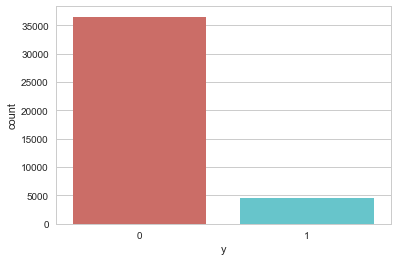

<Figure size 432x288 with 0 Axes>

In [25]:
# create a seaborn countplot of the 'y' column
sns.countplot(x='y',data=data, palette='hls')
plt.show()

In [5]:
# count the number of rows where 'y' column has a 0 value (customer didn't subscribe)
count_no_sub = len(data[data['y']==0])
print(count_no_sub)

36548


In [6]:
# count the number of rows where 'y' column has a 1 value (customer subscribed)
count_sub = len(data[data['y']==1])
print(count_sub)

4640


In [7]:
# find the percentage of non subscribers
pct_of_no_sub = count_no_sub / (count_no_sub + count_sub)
print("percentage of no subscriptions is", pct_of_no_sub * 100)

percentage of no subscriptions is 88.73458288821988


In [8]:
pct_of_sub = count_sub / (count_no_sub + count_sub)
print("percentage of subscription", pct_of_sub * 100)

percentage of subscription 11.265417111780131


We can see our classes are imbalanced, and the ratio of non-subscription to subscription is 89:11. 

Before we balance the classes, we will do some more exploration.

We will calculate the means of all categorical variables, starting with the 'y' field.

In [30]:
# group by the values of 'y' (0 and 1) and perform a mean on all numerical columns
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


We can observe the following:

- the average age of customers who bought the term deposit is higher than those who didn’t
- the pdays (days since  customer was last contacted) is lower for the customers who bought it. The lower the pdays, the better the memory of the last call, and hence the better chances of a sale
- surprisingly, campaigns (number of calls made during the current campaign) are lower for customers who bought the term deposit

We will calculate the means for other categorical variables such as education and marital status, to get a more detailed sense of our data.

In [31]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [32]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [33]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


## Visualisations

In [10]:
# create a crosstab of all job values against the 'y' field
pd.crosstab(data.job,data.y)

y,0,1
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


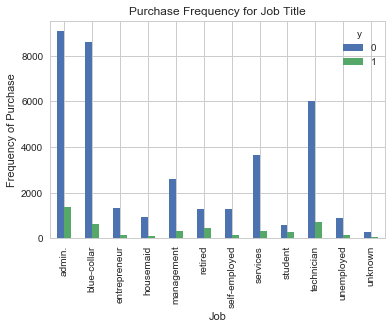

In [34]:
# create a barchart of the above crosstab
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

The frequency of deposit purchase ('y') depends to a great extent on the job title. Therefore, the job title can be a good predictor of the outcome variable

We will look at the 'marital' field next.

Text(0,0.5,'Proportion of Customers')

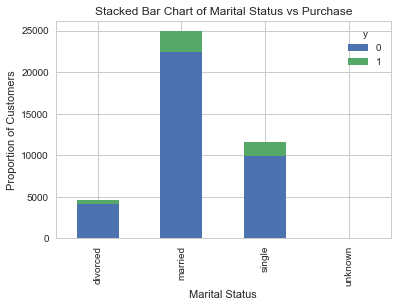

In [15]:
# if we create a barchart like above, the proportion of customers varies a lot (between 5000- 25000) depending on marital value
# it's probably better to normalise (or %) these values so it's easier to compare values
%matplotlib inline
pd.crosstab(data.marital,data.y).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

We will normalise the values instead:

In [16]:
table = pd.crosstab(data.marital,data.y)
print(table)

y             0     1
marital              
divorced   4136   476
married   22396  2532
single     9948  1620
unknown      68    12


Text(0,0.5,'Proportion of Customers')

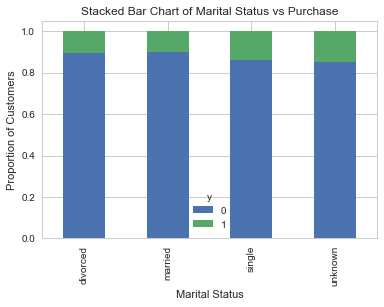

In [22]:
# normalise the 'y' values so they're like percentages - therefore the bars are the same height
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

We can see the marital status does not seem a strong predictor for the outcome variable (similar proportions for each marital status)

We will do the same for 'education'

In [23]:
table = pd.crosstab(data.education,data.y)
print(table)

y                        0     1
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unknown               1480   251


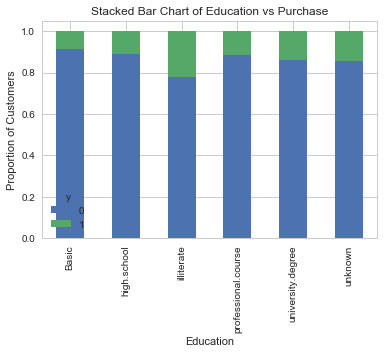

In [40]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

Education seems a good predictor of the outcome variable.

We will do the same for 'day_of_week'

Text(0,0.5,'Frequency of Purchase')

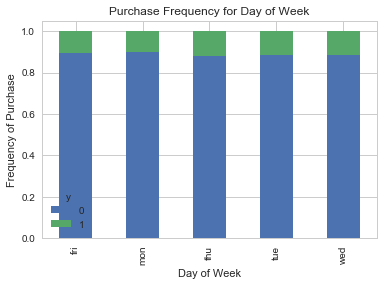

In [24]:
table = pd.crosstab(data.day_of_week,data.y)

table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

Day of the week may not be a good predictor of the outcome

We will do the same for 'Month'

Text(0,0.5,'Frequency of Purchase')

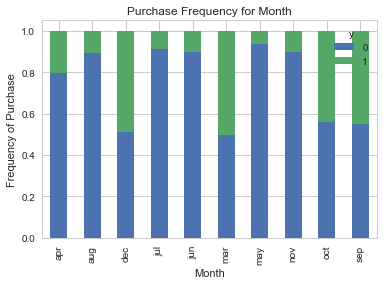

In [26]:
table = pd.crosstab(data.month,data.y)

table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

Month might be a good predictor of the outcome variable.

Next, we will look at the proportion of ages across the bank

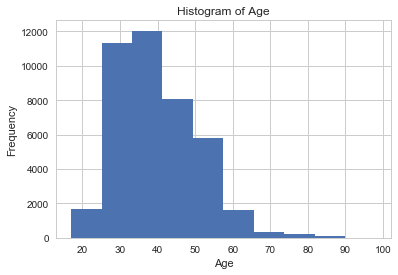

In [43]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Most of the customers of the bank in this dataset are in the age range of 30-40

Next, we will look at 'poutcome' (outcome of the previous marketing campaign)

Text(0,0.5,'Frequency of Purchase')

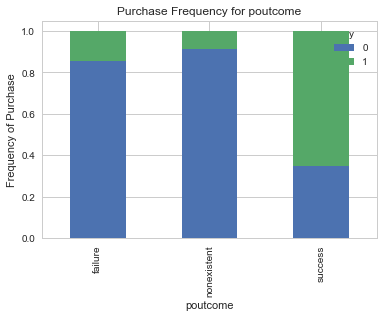

In [27]:
table = pd.crosstab(data.poutcome,data.y)

table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Purchase Frequency for poutcome')
plt.xlabel('poutcome')
plt.ylabel('Frequency of Purchase')

Poutcome seems to be a good predictor of the outcome variable

## Creating Dummy Variables

Dummy variables have only two values; zero and one

In [22]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

print(cat_vars)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [23]:
# loop through each  of the column headers above, and append 'var' to the front of each
for var in cat_vars:
    cat_list='var'+'_'+var
    print(cat_list)

var_job
var_marital
var_education
var_default
var_housing
var_loan
var_contact
var_month
var_day_of_week
var_poutcome


In [24]:
# loop through each of the column headers, and split each column out by their unique values, and assign 1 or 0 to each
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    print(cat_list.head())

   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0           0                1                 0              0   
1           0                0                 0              0   
2           0                0                 0              0   
3           0                0                 0              0   
4           0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               0            0                  0             0            0   
1               0            0                  0             0            0   
2               1            0                  0             0            0   
3               0            0                  0             1            0   
4               0            1                  0             0            0   

   job_technician  job_unemployed  job_unknown  
0               0               0            0  
1               1 

In [25]:
# loop through each of the column headers, and split each column out by their unique values, and assign 1 or 0 to each
# this time, join those new columns onto the main data set 
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data = data.join(cat_list)
    #data=data1

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,0,0,0,0,1,0,0,0,1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,0,0,1,0,0,0,0,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,0,0,0,0,1,0,0,0,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,0,0,1,0,0,0,0,0,1,0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,0,0,1,0,0,0,0,0,0,1


In [26]:
# now we have each of the category columns split out into separate columns, each suffixed by their unique values, we
# can remove the original category columns
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()

# notice that the below column headers 'job', 'marital', 'education' etc. will be removed in the next code block
data_vars

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month

In [27]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()

# create a list of columns, only keeping columns that are NOT IN (or essentially excluding) the original category columns above
to_keep=[i for i in data_vars if i not in cat_vars]

# can see the below list of columns excludes the category columns above
to_keep

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_

We will use the above list of columns as our final list of columns.

In [28]:
# filter the dataset by the final list of columns, and call the final dataset 'data_final'
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [29]:
# this is the final dataset
data_final.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


## Over-Sampling Using SMOTE

With our training data created, we will up-sample the no-subscription using the SMOTE algorithm (Synthetic Minority Oversampling Technique). 

At a high level, SMOTE:

- Creates synthetic samples from the minor class (no-subscription) instead of creating copies
- Randomly chooses one of the k-nearest-neighbors and uses it to create a similar, but randomly tweaked, new observations

We will implement SMOTE in Python

In [30]:
X = data_final.loc[:, data_final.columns != 'y']   # select all rows and columns excluding the 'y' column
y = data_final.loc[:, data_final.columns == 'y']   # select all rows and just the 'y' column

In [33]:
X.head(3)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1


In [34]:
y.head(3)

,y
0,0
1,0
2,1


In [45]:
# check the number of rows and columns of the final dataset
data_final.shape

(41188, 62)

In [ ]:
# install re-sampling package
!pip install imblearn

In [35]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

os

SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=0, ratio=None,
   sampling_strategy='auto', svm_estimator='deprecated')

In [36]:
# create the training and test datasets (the test datasets are set to 30% of the overall size of the dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
# check the size of the training and test data subsets (training should be 70%, and test should be 30%)
X_train.shape

(28831, 61)

In [39]:
X_test.shape

(12357, 61)

In [40]:
y_train.shape

(28831, 1)

In [41]:
y_test.shape

(12357, 1)

In [46]:
# fit the training data (category columns and predictor column) to the model
os_data_X,os_data_y = os.fit_sample(X_train, y_train)

C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
# extends the training dataset with more rows (oversampling), and updates the values
os_data_X

array([[3.10000000e+01, 2.59000000e+02, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.40000000e+01, 3.00000000e+02, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.30000000e+01, 1.34000000e+02, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [2.71790332e+01, 1.01672569e+02, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.60931848e+01, 7.16000000e+02, 4.93011143e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.94553577e+01, 1.42406248e+02, 1.00000000e+00, ...,
        2.27678859e-01, 7.72321141e-01, 0.00000000e+00]])

In [54]:
os_data_X.shape

(51134, 61)

In [51]:
os_data_y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [55]:
os_data_y.shape

(51134, 1)

In [52]:
columns = X_train.columns

# create a new training oversampled dataset, filling in the updated values in place of their old values, 
# and extending the dataset with more rows
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

In [56]:
os_data_X.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,31.0,259.0,1.0,999.0,1.0,-0.1,93.200,-42.0,4.153,5195.8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,44.0,300.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,43.0,134.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,35.0,169.0,2.0,999.0,0.0,-0.1,93.200,-42.0,4.153,5195.8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,33.0,255.0,2.0,999.0,1.0,-1.8,92.893,-46.2,1.266,5099.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [57]:
os_data_y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [60]:
# check number of rows in the training dataset
print("length of oversampled data is ",len(os_data_X))

# check number of 'no' subscriptions in the training dataset
print("Number of 'no' subscriptions in oversampled data",len(os_data_y[os_data_y['y']==0]))

# check number of 'yes' subscriptions in the training dataset
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))

print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_y))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_y))


length of oversampled data is  51134
Number of 'no' subscriptions in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


Now we have perfect balanced data! We over-sampled only on the training data, to ensure none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

## Recursive Feature Elimination (RFE)

RFE is a process based on repeatedly constructing a model and choosing either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. 

This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [56]:
# create a list of column names in the dataset
data_final_vars=data_final.columns.values.tolist()

# select just the 'y' column
y=['y']

# select all columns that are not 'y'
X=[i for i in data_final_vars if i not in y]

In [61]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a logistic regression object
logreg = LogisticRegression()
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
# create rfe object, providing the logreg as a parameter and limiting to 20 features
rfe = RFE(logreg, 20)
rfe

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=20, step=1, verbose=0)

In [ ]:
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

In [66]:
# each 'True' represents one of the 20 selected features
print(rfe.support_)

[False False False False False False False False  True False False  True
 False  True False False  True  True False  True False False False False
 False  True False False  True False False False  True  True False False
 False False False False False  True  True  True False False False False
  True  True  True  True  True False False False False False  True False
  True]


In [65]:
# each '1' represents one of the 20 selected features
print(rfe.ranking_)

[37 35 24 38  7 10 20 33  1 31  5  1  4  1  2 30  1  1 27  1  3  8 17 18
 13  1 11 15  1 14 19 16  1  1 42 25 39 34 29 36 32  1  1  1  6 23 40 22
  1  1  1  1  1 28  9 26 41 21  1 12  1]


The Recursive Feature Elimination (RFE) has helped us select the following features: 

"previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [67]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 

# revise the X columns, only selecting the key feature columns above
X=os_data_X[cols]

y=os_data_y['y']

## Implementing The Model

In [68]:
import statsmodels.api as sm

logit_model=sm.Logit(y,X)
logit_model

In [69]:
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.545904
         Iterations: 35
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.212     
Dependent Variable:      y                    AIC:                  55868.4619
Date:                    2018-12-11 18:00     BIC:                  56045.3060
No. Observations:        51134                Log-Likelihood:       -27914.   
Df Model:                19                   LL-Null:              -35443.   
Df Residuals:            51114                LLR p-value:          0.0000    
Converged:               0.0000               Scale:                1.0000    
No. Iterations:          35.0000                                              
------------------------------------------------------------------------------
                      Coef.    Std.Err.    z     P>|z|     [0.025     0.975]  
------------------------------------------------------------------------------
euribor3m         

C:\Users\Chris\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


We can see the p-values for four variables (default_no, default_unknown, contact_cellular, contact_telephone) are very high. Therefore, we will remove them.

In [70]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 
      'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

In [71]:
# run the model again, having removed the four columns
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.555890
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.198     
Dependent Variable:   y                 AIC:               56881.7793
Date:                 2018-12-11 18:14  BIC:               57023.2546
No. Observations:     51134             Log-Likelihood:    -28425.   
Df Model:             15                LL-Null:           -35443.   
Df Residuals:         51118             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m            -0.4488   0.0074 -60.6838 0.0000 -0.4632 -0.4343
job_blue-collar 

## Logistic Regression Model Fitting

In [76]:
# reminder of the size of the new datasets - they have increased since the beginning
X.shape

(51134, 16)

In [77]:
y.shape

(51134,)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# create the training and test datasets (the test datasets are set to 30% of the overall size of the dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [80]:
# training represents 70% of the total rows (51134) - also include 16 columns (selected 20 features but removed 4)
X_train.shape

(35793, 16)

In [75]:
# testing represents 30% of the total rows (51134) 
X_test.shape

(15341, 16)

In [83]:
# same for the y training set
y_train.shape

(35793,)

In [84]:
# same for the y test set
y_test.shape

(15341,)

In [63]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [87]:
# create a logistic regression object and fit the training datasets to it
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
# we will now predict the test set results and calculate the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [90]:
# see the predicted values for subscribing to a term deposit
print(y_pred)

[0 1 1 ... 0 1 0]


## Confusion Matrix

A confusion matrix is a table often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

In [64]:
from sklearn.metrics import confusion_matrix

# create confusion matrix to compare the actual result (y_test) to the predicted results (y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6124 1542]
 [2505 5170]]


## Classification Report

The classification report allows us to calculate the precision, recall, F score and support.

- The precision is the ratio: tp / (tp + fp). Where tp is the number of true positives, and fp the number of false positives. The precision is the ability of the classifier to not label a sample as positive, if it is negative

- The recall is the ratio: tp / (tp + fn). Where tp is the number of true positives, and fn the number of false negatives. The recall is the ability of the classifier to find all the positive samples

- The F-beta score is the weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

- The support is the number of occurrences of each class in y_test.

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      7666
           1       0.77      0.67      0.72      7675

   micro avg       0.74      0.74      0.74     15341
   macro avg       0.74      0.74      0.74     15341
weighted avg       0.74      0.74      0.74     15341



Of the entire test set, 74% of the customer's preferred term deposit were promoted

## ROC Curve

The Receiver Operating Characteristic (ROC) curve is a common tool used with binary classifiers. 

The dotted line represents the ROC curve of a purely random classifier. A good classifier stays as far away from that line as possible (toward the top-left corner).

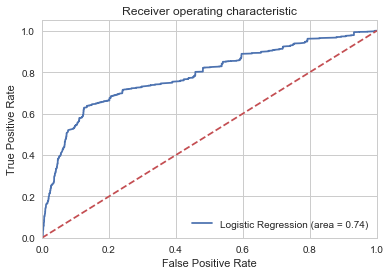

In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()